<a href="https://colab.research.google.com/github/amunwes/Elec-400M/blob/main/ELEC400M_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I Google Colab

**What is Colab?**
Colab, or "Colaboratory", allows you to write and execute Python in your browser, with



*   Zero configuration required
*   Free access to GPUs
*   Easy sharing



[Google Colaboratory](https://colab.research.google.com/?utm_source=scs-index#)

[Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow)

**The reasons** we suggest using Colab for the assignments/projects in this class is because:

1.   We will use Python as our main programming language for the class, and Google Colab is like Google Drive of Jupyter Notebook that you can easily share with your teammates.
2.   When it comes to Deep Learning, you may need GPUs to accelerate your trainings to catch up with the deadlines, and Google Colab provides free GPU computing resources.
3.   You DON'T need to install Python library packages one by one to start your job.
4.   (tips) Each Google account can launch 2 running tasks in Colab, so if you have more Google accounts, you can run multiple training at the same time.
5.   (tips) Remember to save your output files before closing the website/tab.



**Example:**

Calculate the inner product of a=[1, 1, 1, 1, 1, 1] and b=[1, 0, -1, 1, 0, -1].

In [ ]:
import numpy as np
a = np.array([1, 1, 1, 1, 1, 1] )
b = np.array([1, 0, -1, 1, 0, -1])
np.dot(a, b)

0

# Part II Scikit-Learn

**What is Scikit-Learn?**
Scikit-Learn, or sklearn, is an useful Python package which is


*   Simple and efficient tools for predictive data analysis
*   Accessible to everybody, and reusable in various contexts
*   Built on NumPy, SciPy, and matplotlib
*   Open source, commercially usable - BSD license

In general, Scikit-Learn is a convenient package to do Machine Learning tasks, and it can integrate with other useful packages.  

[Scikit-Learn](https://scikit-learn.org/stable/)



**Example:**

Fit a 2-D Linear Regression line to predict the relationship between *Years of Working Experience(X)* and *Salary You Can Earn(y)*.

$y = w_1*X + w_0$


In [ ]:
# import packages

# reading/dealing with csv files
import pandas as pd
# loading ML algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read in the data csv
dataset = pd.read_csv('linear_regression_ex.csv')
dataset.describe()


,experience,salary
count,20.000000,20.000000
mean,8.025000,10450.000000
std,6.131186,6607.153221
min,0.000000,2250.000000
25%,2.750000,5375.000000
50%,7.500000,8600.000000
75%,12.250000,15000.000000
max,20.000000,23000.000000


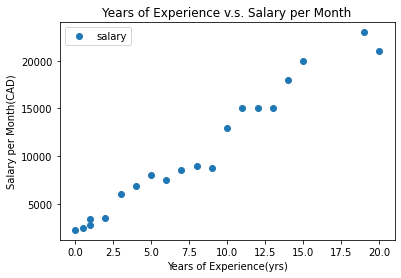

In [ ]:
# plot out the data distribution
dataset.plot(x='experience', y='salary', style='o')
plt.title('Years of Experience v.s. Salary per Month')
plt.xlabel('Years of Experience(yrs)')
plt.ylabel('Salary per Month(CAD)')
plt.show()

In [ ]:
# pull out the data of interest
X = dataset['experience'].values.reshape(-1, 1) # sklearn requires 2-D array as inputs
y = dataset['salary'].values.reshape(-1, 1)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# initialize linear regression class and fit the model with training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# check the result w0 and w1
w_0 = regressor.intercept_
w_1 = regressor.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)

Interception :  [1965.45757293]
Coeficient :  [[1069.05821234]]


In [ ]:
# predict y
y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)

Predict :  [[12656.03969628]
 [ 1965.45757293]
 [11586.98148395]
 [ 3034.51578527]]


In [ ]:
# Visualize the results in a table
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,13000,12656.039696
1,2250,1965.457573
2,8700,11586.981484
3,3400,3034.515785


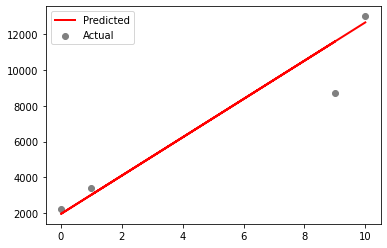

In [ ]:
# Visualize the results in a graph
plt.scatter(X_test, y_test,  color='gray', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Find the Errors of your prediction
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 970.2421073664582
Mean Squared Error: 2166878.4708034773
Root Mean Squared Error: 1472.0320889177237


In [ ]:
# A better evaluation of your prediction (R^2)
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.8833551554521178
Accuracy: 88.33551554521179%


[Scikit-Learn score ref](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

# PART III **PyTorch**

PyTorch is one of the most popular open-source Deep Learning frameworks developed and maintained by **Meta (Facebook)**. It is very popular among researchers and developers as it provides fast and flexible implementations and seamless transaction to production deployments. Here are some basic concepts about PyTorch


*   PyTorch defines a datatype - Tensor, which is very similar to NumPy Array. This allows us to easily operate on array/matrix-like inputs.
*   PyTorch Tensors can automatically track the gradients which is useful in gradient decent/back propagation -- very useful when training a deep learning model.
*   PyTorch has many built-in training algorithms and famous models such as Adam optimizer and ResNet series.
*   For more details, please refer to this tutorial https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html or their official website https://pytorch.org/.




We will introduce some basic usage of PyTorch Tensor in this part.



1. PyTorch Tensors (Tensor) and NumPy Arrays (Array) share similar initializations and are interchangable to each other.

In [ ]:
import numpy as np
import torch

print('---------- NumPy Array and PyTorch Tensor conversion ----------')
# We can initialize Tensor and Array in similar ways
print('Initialization:')
a = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
b = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
print(f'a(numpy)={a}')
print(f'b(tensor)={b}')
print()

# We can directly convert between Array and Tensor
print('Conversion:')
a_tensor = torch.from_numpy(a)
b_numpy = np.array(b)
print(f'a(tensor)={a_tensor}')
print(f'b(numpy)={b_numpy}')
print()

print('---------- NumPy Array and PyTorch Tensor initialization ----------')
# The ways to initialize an all-0, all-1, random arrays are similar
shape = (2, 2, 3)

# Initialize NumPy Arrays
print('Special initialization -- NumPy')
a0_numpy = np.zeros(shape)
a1_numpy = np.ones(shape)
rand_numpy = np.random.randn(shape[0], shape[1], shape[2])
print(f'0s(numpy)={a0_numpy}')
print(f'1s(numpy)={a1_numpy}')
print(f'random(numpy)={rand_numpy}')
print()

# Initialize PyTorch Tensors
print('Special initialization -- PyTorch')
a0_tensor = torch.zeros(shape)
a1_tensor = torch.ones(shape)
rand_tensor = torch.randn(shape)
print(f'0s(tensor)={a0_tensor}')
print(f'1s(tensor)={a1_tensor}')
print(f'random(tensor)={rand_tensor}')
print()

---------- NumPy Array and PyTorch Tensor conversion ----------
Initialization:
a(numpy)=[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]
b(tensor)=tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])

Conversion:
a(tensor)=tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])
b(numpy)=[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]

---------- NumPy Array and PyTorch Tensor initialization ----------
Special initialization -- NumPy
0s(numpy)=[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]
1s(numpy)=[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]
random(numpy)=[[[-0.50163224 -0.06926081 -1.33115862]
  [ 1.40406114  0.10918661  0.26670177]]

 [[ 0.316651   -0.82542648  0.5737989 ]
  [ 0.51291782  0.00463353  0.0819398 ]]]

Special initialization -- PyTorch
0s(tensor)=tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
1s(tensor)=tensor([[[1., 1., 1.],
         [1., 1., 1.]],

 

2. PyTorch Tensor matrix operations

In [ ]:
# Matrix operations - add, subtract, multiply, divide, concatenate
a = torch.ones((3, 3))
b = 2*torch.ones((3, 3))
print(f'a={a}')
print(f'b={b}')
print()

print('---------- Add ----------')
print(a+b)
print()

print('---------- Substract ----------')
print(a-b)
print()

print('---------- Multiply ----------')
print(a.mul(b)) # element-wise multiplication, same as a*b
print(a.matmul(b)) # matrix multiplicaton
print()

print('---------- Divide ----------')
print(a/b) # element-wise division
print(torch.div(a, b)) # element-wise division
print()

print('---------- Concatenate ----------')
print(torch.cat([a, b], dim=0)) # through dim 0
print(torch.cat([a, b], dim=1)) # through dim 1
print()

a=tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
b=tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

---------- Add ----------
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

---------- Substract ----------
tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]])

---------- Multiply ----------
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

---------- Divide ----------
tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])
tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])

---------- Concatenate ----------
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

3. How to compute gradient in PyTorch? **torch.autograd!**

torch.autograd is PyTorch’s automatic differentiation engine that powers neural network training.
We only need to call target.backward() to find the corresponding gradients.

We show a simple example here:

Given an equation $Q = 3a^3 - b^2$.
We want to find the gradient of $Q$ w.r.t. $a$ and $b$, $\frac{\partial Q}{\partial a} = 9a^2$ and $\frac{\partial Q}{\partial b} = -2b$.


In [ ]:
# initialize tensors
a = torch.tensor([2., 3.])
b = torch.tensor([6., 4.])

# Q = 3a^3 - b^2
Q = 3*a**3 - b**2

# Note that in back propagation, we need to know Q's gradient first to further calculate the gradients backwards.
# Since here Q is our target and IT IS A VECTOR, so we simply need to assign [1, 1] to it (dQ/dQ = 1)
Q_grad = torch.tensor([1., 1.])
Q.backward(gradient=Q_grad)

# Now we can check the gradients of a and be by calling a.grad and b.grad, respectively
print(f'Q = {Q}')
print(f'a = {a}')
print(f'b = {b}')
print(f'dQ/da = {a.grad}')
print(f'9a^2 = {9*a**2}')
print(f'dQ/db = {b.grad}!')
print(f'-2b = {-2*b}')

RuntimeError: ignored

What's wrong?
We need to initialize tensors with flag 'requires_grad' so that PyTorch knows the tensor needs tracking the gradients!
After seeting up, PyTorch will automatically compute and store the gradients for us.


In [ ]:
# initialize tensors with flag 'requires_grad=True'
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

# Q = 3a^3 - b^2
Q = 3*a**3 - b**2

# Note that in back propagation, we need to know Q's gradient first to further calculate the gradients backwards.
# Since here Q is our target and IT IS A VECTOR, so we simply need to assign [1, 1] to it (dQ/dQ = 1)
Q_grad = torch.tensor([1., 1.])
Q.backward(gradient=Q_grad)

# Now we can check the gradients of a and be by calling a.grad and b.grad, respectively
print(f'Q = {Q}')
print(f'a = {a}')
print(f'b = {b}')
print(f'dQ/da = {a.grad}')
print(f'9a^2 = {9*a**2}')
print(f'dQ/db = {b.grad}!')
print(f'-2b = {-2*b}')

Q = tensor([-12.,  65.], grad_fn=<SubBackward0>)
a = tensor([2., 3.], requires_grad=True)
b = tensor([6., 4.], requires_grad=True)
dQ/da = tensor([36., 81.])
9a^2 = tensor([36., 81.], grad_fn=<MulBackward0>)
dQ/db = tensor([-12.,  -8.])!
-2b = tensor([-12.,  -8.], grad_fn=<MulBackward0>)


One thing to notice is that, if the variable we're going to call ".backward()" on is a scalar (say our loss), We don't need to provide any input. For example:

In [ ]:
# initialize tensors with flag 'requires_grad=True'
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

# Q = a*b^T
Q = a.matmul(b.T)

# Now do Q.backward()
Q.backward()

# Now we can check the gradients of a and be by calling a.grad and b.grad, respectively
print(f'dQ/da = {a.grad}')
print(f'b.T = {b.T}')



dQ/da = tensor([6., 4.])
b.T = tensor([6., 4.], grad_fn=<PermuteBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  


## Training a deep learning framework with PyTorch

### Typically, training a deep learning framework with PyTorch contains

 1.   Set up the way you want to load your data (TensorDataset, DataLoader)
 2.   Define the DL network you want to use (nn.Module)
 3.   Define training strategies (loss function, optimizer)
 4.   Integrate your train steps, and report loss and accuracy for each step
 5.   Summerize training results (loss, accuracy, time)


### 1. Set up the way you want to load your data
In your HW4, you will use TensorDataset and DataLoader to manage your input.

**TensorDataset:**
The class helps you **read your input data into PyTorch system**. It takes (data, label) as input, the 1st dimension of data and label should match.

**DataLoader:**
The class helps you **define the way to load the tensor inputs into training**. It defines some hyperparameters such as batch size and whether to shuffle data or not, and takes PyTorch Dataset class as input.


In [ ]:
import numpy as np
import torch

# make sure you have gpu available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
# make the results are reproducable
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)

# Let's first define random image inputs.
def init_toy_data(dim):
    np.random.seed(0)
    X = 10 * np.random.randn(dim[0], dim[1], dim[2], dim[3])
    y = np.random.randint(low=0, high=3, size=dim[0])
    return X, y

# Define our training and validation data
# Notice that the dimensions of a batch image input follows (batch, channel, H, W)
train_dim = (100, 3, 32, 32)
train_X, train_y = init_toy_data(train_dim)
val_dim = (100, 3, 32, 32)
val_X, val_y = init_toy_data(val_dim)
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

Using device: cuda
(100, 3, 32, 32)
(100,)
(100, 3, 32, 32)
(100,)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 10

# Load data into PyTorch dataset
train_dataset = TensorDataset(torch.from_numpy(train_X).float(), torch.from_numpy(train_y).to(torch.long))
val_dataset = TensorDataset(torch.from_numpy(val_X).float(), torch.from_numpy(val_y).to(torch.long))

# Load PyTorch dataset into DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2) # shuffle trainset for better stochastic result
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)



### 2. Define the DL network you want to use

We use nn.Module as the parent(base) class to define our network in PyTorch.

We will introduce Multi Layer Perceptron (MLP) and Convolutional Neural Network (CNN) in this tutorial.



**MLP: torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None);**
The layer expects input of shape (batch_size, in_features) and will produce output of shape (batch_size, out_features).

**CNN: torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None);**
The layer expects input of shape (batch_size, in_channels, H_in, W_in) and will produce output of different shapes according to the hyperparameter design.

For more details, please refer to https://pytorch.org/docs/stable/generated/torch.nn.Linear.html and https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html.


In [ ]:
import torch.nn as nn

# define a simple MLP model.
class toy_linear_model(nn.Module):
    def __init__(self, input_d, hidden_d, output_d):
        super().__init__()

        # define 2 linear layers
        self.linear0 = nn.Linear(input_d, hidden_d)
        self.linear1 = nn.Linear(hidden_d, output_d)

    def forward(self, x):

        # Flatten the input
        # 3,32*,32 -> 1,3*32*32
        output = torch.flatten(x, 1)

        output = self.linear0(output)
        output = self.linear1(output)

        return output


# define a simple CNN model. Note we assume our input has shape (batch, 3, 32, 32) as CIFAR10 images.
class toy_cnn_model(nn.Module):
    def __init__(self, channels, num_classes):
        super().__init__()

        # define 2 convolutional layers
        self.conv0 = nn.Conv2d(channels[0], channels[1], kernel_size=3)
        self.conv1 = nn.Conv2d(channels[1], channels[2], kernel_size=3)

        # define linear layers to project
        self.linear0 = nn.Linear(28*28*channels[2], 1024)
        self.linear1 = nn.Linear(1024, num_classes)

    def forward(self, x):

        output = self.conv0(x)
        output = self.conv1(output)

        # flatten the feature map except the batch dim
        output = torch.flatten(output, 1)

        output = self.linear0(output)
        output = self.linear1(output)

        return output


In [ ]:
# define MLP model and CNN model, and put them into GPU
MLP_model = toy_linear_model(3*32*32, 1024, 3).to(device)
CNN_model = toy_cnn_model([3, 16, 32], 3).to(device)
print(MLP_model)
print(CNN_model)

toy_linear_model(
  (linear0): Linear(in_features=3072, out_features=1024, bias=True)
  (linear1): Linear(in_features=1024, out_features=3, bias=True)
)
toy_cnn_model(
  (conv0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (linear0): Linear(in_features=25088, out_features=1024, bias=True)
  (linear1): Linear(in_features=1024, out_features=3, bias=True)
)


### 3. Define training strategies

We will define the strategies we want to apply to our DL training.

**Loss function:**
PyTorch provides several loss functions. We will use Cross Entropy Loss for our classification model. Please refer to https://pytorch.org/docs/stable/nn.html#loss-functions for more options.

**Optimizer:**
PyTorch provides several optimizer algorithms. Here we use Adam as our optimizer. Please refer to https://pytorch.org/docs/stable/optim.html for more options.



In [ ]:
# Define cross entropy loss function as criterion
criterion = nn.CrossEntropyLoss()

# Define 2 Adam optimizers for our MLP and CNN models
optimizer_MLP = torch.optim.Adam(MLP_model.parameters())
optimizer_CNN = torch.optim.Adam(CNN_model.parameters())

### 4. Integrate your train steps, and report loss and accuracy for each step

Here we will define two functions, train_model and val_model. The train_model function is expected to execute forward pass, backward propagation, optimizing learning rate, and reporting training loss and accuracy. The val_model function is expected to do forward pass and reports validation loss and accuracy.

In [ ]:
def train_model(train_loader, model, optimizer, criterion):
    train_loss, train_acc = 0.0, 0.0
    # set model to training mode so that it computes things that are needed to update the loss
    model.train()
    for i, (images, labels) in enumerate(train_loader):

        # put our inputs into GPU
        images = images.to(device)
        labels = labels.to(device)

        # clear gradients in optimizer before back propagation
        optimizer.zero_grad()

        # feed images into model and fine the predicted output
        outputs = model(images)

        # compute loss and back propagation
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Track train loss by multiplying average loss by number of examples in batch
        train_loss += loss.item() * images.size(0)

        # Calculate accuracy by finding max log probability
        _, pred = torch.max(outputs, dim=1)
        correct_tensor = pred.eq(labels.data.view_as(pred))

        # Need to convert correct tensor from int to float to average
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))

        # Multiply average accuracy times the number of examples in batch
        train_acc += accuracy.item() * images.size(0)

    # average loss and accuracy
    train_loss = train_loss / len(train_loader.dataset)
    train_acc = train_acc / len(train_loader.dataset)

    return train_loss, train_acc


def val_model(val_loader, model, criterion):
    val_loss, val_acc = 0.0, 0.0

    # set model to validation mode so that it DOESN'T computes things that are needed to update the loss
    with torch.no_grad():

        model.eval()

        for i, (images, labels) in enumerate(val_loader):

            # put our inputs into GPU
            images = images.to(device)
            labels = labels.to(device)

            # feed images into model and fine the predicted output
            outputs = model(images)

            # compute loss
            loss = criterion(outputs, labels)

            # Track validation loss by multiplying average loss by number of examples in batch
            val_loss += loss.item() * images.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(outputs, dim=1)
            correct_tensor = pred.eq(labels.data.view_as(pred))

            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))

            # Multiply average accuracy times the number of examples in batch
            val_acc += accuracy.item() * images.size(0)

        # average loss and accuracy
        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_acc / len(val_loader.dataset)

    return val_loss, val_acc

### 5. Summerize training results

Here we begin training our MLP model. We will summarize the loss, accuracy and time.

In [ ]:
import time

epochs = 20

# train MLP
start_time = time.time()
print('-----------------------Train MLP-------------------------')
for epoch in range(1, epochs+1):
    train_loss, train_acc = train_model(train_loader, MLP_model, optimizer_MLP, criterion)
    val_loss, val_acc = val_model(val_loader, MLP_model, criterion)
    print(f'Epoch: {epoch}')
    print(f'  Training Loss: {train_loss}, Training Accuracy: {train_acc}')
    print(f'  Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

print(f'Elapsed time for MLP model: {(time.time()-start_time)/60} mins')

# train CNN
start_time = time.time()
print('-----------------------Train CNN-------------------------')
for epoch in range(1, epochs+1):
    train_loss, train_acc = train_model(train_loader, CNN_model, optimizer_CNN, criterion)
    val_loss, val_acc = val_model(val_loader, CNN_model, criterion)
    print(f'Epoch: {epoch}')
    print(f'  Training Loss: {train_loss}, Training Accuracy: {train_acc}')
    print(f'  Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

print(f'Elapsed time for CNN model: {(time.time()-start_time)/60} mins')


-----------------------Train MLP-------------------------
Epoch: 1
  Training Loss: 12.48176155090332, Training Accuracy: 0.3200000040233135
  Validation Loss: 0.7361721106906771, Validation Accuracy: 0.9399999916553498
Epoch: 2
  Training Loss: 0.7845265764952635, Training Accuracy: 0.9600000023841858
  Validation Loss: 0.03694667995220868, Validation Accuracy: 0.9899999976158143
Epoch: 3
  Training Loss: 0.07953918590443046, Training Accuracy: 0.9899999976158143
  Validation Loss: 8.92944893276848e-05, Validation Accuracy: 1.0
Epoch: 4
  Training Loss: 0.0003920087864969446, Training Accuracy: 1.0
  Validation Loss: 0.0008239072933655222, Validation Accuracy: 1.0
Epoch: 5
  Training Loss: 0.0011662624672641897, Training Accuracy: 1.0
  Validation Loss: 9.775144391710455e-08, Validation Accuracy: 1.0
Epoch: 6
  Training Loss: 1.0728812434024349e-07, Training Accuracy: 1.0
  Validation Loss: 1.311298076345224e-07, Validation Accuracy: 1.0
Epoch: 7
  Training Loss: 1.442427308262495e-07